<a href="https://colab.research.google.com/github/Ben-069/GIS-Public-Sector/blob/main/PSO1BENITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Good Morning Dr.Okulicz-Kozaryn

I had a lot of problems with merging the maps from Paraguay because there are a lot of special characters in Spanish and in our indigenous language Guarani! That will cost me a lot of extra time to learn how to merge, so I decide to change (for this time) to Agriculture and Food Security in New Jersey.
I'm taking a pyhton course for begginers, so I'm expecting to go thru the Paraguayan maps when I get better at it!


In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [3]:
#!python --version
gpd.__version__

'1.0.1'

In [4]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC#make the map

<Axes: >

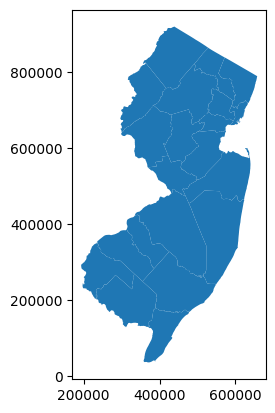

In [5]:
#make the map
njC0.plot()

In [6]:
foodinse=pd.read_excel('https://docs.google.com/uc?id=1lamPIKqdzYhPe4ulndr7jvfA3vc-9S1W&export=download')

In [7]:
foodinse.head(10)

,"County, New Jersey, United States",Estimated Percentage of Persons,Estimated Count
0,Atlantic,12.2%,"33,540"
1,Bergen,8.9%,"84,380"
2,Burlington,7.9%,"36,610"
3,Camden,11.3%,"59,140"
4,Cape May,11.9%,"11,350"
5,Cumberland,13.1%,"20,170"
6,Essex,11.6%,"99,210"
7,Gloucester,8.9%,"26,960"
8,Hudson,13.0%,"92,760"
9,Hunterdon,6.8%,"8,720"


In [8]:
foodinse.columns

Index(['County, New Jersey, United States', 'Estimated Percentage of Persons',
       'Estimated Count'],
      dtype='object')

In [9]:
foodinse ['County, New Jersey, United States']

,"County, New Jersey, United States"
0,Atlantic
1,Bergen
2,Burlington
3,Camden
4,Cape May
5,Cumberland
6,Essex
7,Gloucester
8,Hudson
9,Hunterdon


In [11]:
njC0.columns

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [10]:
njC0['COUNTY']

,COUNTY
0,ATLANTIC
1,BERGEN
2,BURLINGTON
3,CAMDEN
4,CAPE MAY
5,CUMBERLAND
6,ESSEX
7,GLOUCESTER
8,HUDSON
9,HUNTERDON


In [12]:
foodinse['COUNTY']=foodinse['County, New Jersey, United States'].str.upper()

In [13]:
foodinse.head(10)

,"County, New Jersey, United States",Estimated Percentage of Persons,Estimated Count,COUNTY
0,Atlantic,12.2%,"33,540",ATLANTIC
1,Bergen,8.9%,"84,380",BERGEN
2,Burlington,7.9%,"36,610",BURLINGTON
3,Camden,11.3%,"59,140",CAMDEN
4,Cape May,11.9%,"11,350",CAPE MAY
5,Cumberland,13.1%,"20,170",CUMBERLAND
6,Essex,11.6%,"99,210",ESSEX
7,Gloucester,8.9%,"26,960",GLOUCESTER
8,Hudson,13.0%,"92,760",HUDSON
9,Hunterdon,6.8%,"8,720",HUNTERDON


In [14]:
foodinse['Percent Food Insecurity']=foodinse['Estimated Percentage of Persons'].str.replace('%', '')

In [15]:
foodinse['Percent Food Insecurity']=foodinse['Percent Food Insecurity'].astype(float)

In [16]:
#merge
foodinsecur= pd.merge(njC0, foodinse, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
foodinsecur[['COUNTY','Percent Food Insecurity','_merge']] #all good, NEW JERSEY expected not to merge
foodinsefinal=pd.merge(njC0, foodinse, on='COUNTY',how='inner',indicator=False)

,COUNTY,Percent Food Insecurity,_merge
0,ATLANTIC,12.2,both
1,BERGEN,8.9,both
2,BURLINGTON,7.9,both
3,CAMDEN,11.3,both
4,CAPE MAY,11.9,both
5,CUMBERLAND,13.1,both
6,ESSEX,11.6,both
7,GLOUCESTER,8.9,both
8,HUDSON,13.0,both
9,HUNTERDON,6.8,both


<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: zillow.com/research/data')

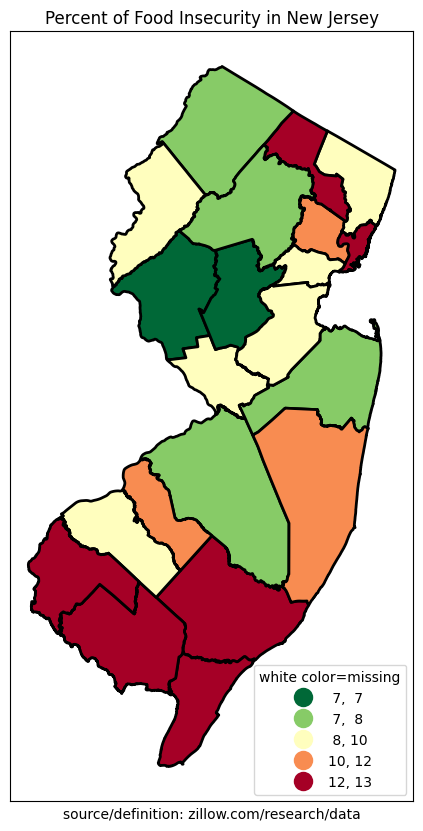

In [17]:
fig, ax = plt.subplots(1, figsize=(6,10))
foodinsefinal.plot(ax=ax,column='Percent Food Insecurity',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Percent of Food Insecurity in New Jersey")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [18]:
cornnj=pd.read_csv('https://docs.google.com/uc?id=10-6tMY3QAIVeaF0RY3lLEw97-sCpyiQk&export=download')

In [19]:
cornnj.head(10)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,BURLINGTON,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"5,336",9.7
1,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,MERCER,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"1,899",9.7
2,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,MIDDLESEX,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"1,428",9.7
3,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,MONMOUTH,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"2,539",9.7
4,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,OCEAN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,125,9.7
5,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,HUNTERDON,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"6,478",9.7
6,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,MORRIS,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,198,(L)
7,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,SOMERSET,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,854,9.7
8,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,SUSSEX,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"4,788",9.7
9,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,WARREN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"13,688",9.7


In [20]:
cornnj.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [21]:
cornnj['COUNTY']=cornnj['County'].str.upper()

In [22]:
cornnj.head(10)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%),COUNTY
0,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,BURLINGTON,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"5,336",9.7,BURLINGTON
1,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,MERCER,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"1,899",9.7,MERCER
2,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,MIDDLESEX,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"1,428",9.7,MIDDLESEX
3,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,MONMOUTH,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"2,539",9.7,MONMOUTH
4,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,CENTRAL,50,OCEAN,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,125,9.7,OCEAN
5,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,HUNTERDON,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"6,478",9.7,HUNTERDON
6,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,MORRIS,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,198,(L),MORRIS
7,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,SOMERSET,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,854,9.7,SOMERSET
8,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,SUSSEX,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"4,788",9.7,SUSSEX
9,CENSUS,2022,YEAR,NaN,COUNTY,NEW JERSEY,34,NORTH,20,WARREN,...,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"13,688",9.7,WARREN


In [23]:
#merge
cornnjstate= pd.merge(njC0, cornnj, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
cornnjstate[['COUNTY','Value','_merge']] #all good, NEW JERSEY expected not to merge
foodinsefinal=pd.merge(njC0, cornnj, on='COUNTY',how='inner',indicator=False)

,COUNTY,Value,_merge
0,ATLANTIC,633,both
1,BERGEN,NaN,left_only
2,BURLINGTON,"5,336",both
3,CAMDEN,186,both
4,CAPE MAY,194,both
5,CUMBERLAND,"4,580",both
6,ESSEX,NaN,left_only
7,GLOUCESTER,"5,072",both
8,HUDSON,NaN,left_only
9,HUNTERDON,"6,478",both


In [24]:
cornnjstate['Value'] = pd.to_numeric(cornnjstate['Value'], errors='coerce')

In [31]:
#need to convert string (object) to numeric (float or int; float is safer can have decimals if needed)
cornnjstate['Value'] = cornnjstate['Value, [1]'].astype(float)

KeyError: 'Value, [1]'

In [36]:
cornnjstate.columns

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'Program', 'Year', 'Period',
       'Week Ending', 'Geo Level', 'State', 'State ANSI', 'Ag District',
       'Ag District Code', 'County', 'County ANSI', 'Zip Code', 'Region',
       'watershed_code', 'Watershed', 'Commodity', 'Data Item', 'Domain',
       'Domain Category', 'Value', 'CV (%)', '_merge'],
      dtype='object')

<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'USDA: National Agricultural Statistics Services')

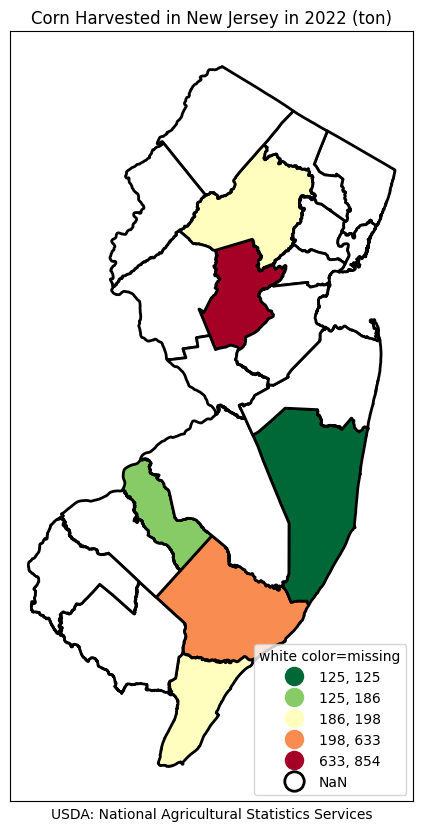

In [47]:
fig, ax = plt.subplots(1, figsize=(6,10))
cornnjstate.plot(ax=ax,column='Value',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4},missing_kwds={'color':'white'})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Corn Harvested in New Jersey in 2022 (ton)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''USDA: National Agricultural Statistics Services''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as